In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

Rozważmy następujący zbiór punktów:

In [14]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples = 20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x = np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

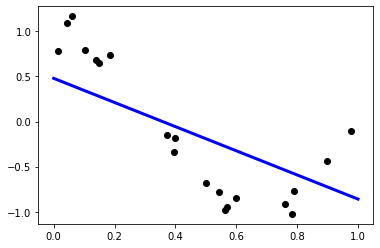

In [15]:
clf = Ridge(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

LR degree 2
LR degree 20


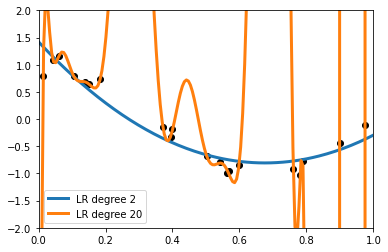

In [16]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Lasso Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

Lasso degree 20, alpha 1
Lasso degree 20, alpha 10000
Lasso degree 20, alpha 0.0001


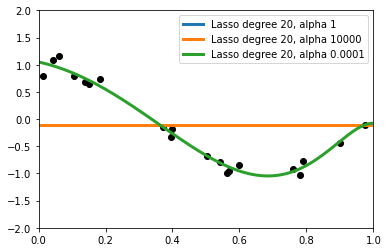

In [17]:
# prepare models
models = []
predicts = []
names=[]
models.append(('Lasso degree 20, alpha 1', make_pipeline(PolynomialFeatures(20, ), Lasso(alpha=1.0, max_iter=10_000) )))
models.append(('Lasso degree 20, alpha 10000', make_pipeline(PolynomialFeatures(20), Lasso(alpha=10_000, max_iter=10_000) )))
models.append(('Lasso degree 20, alpha 0.0001', make_pipeline(PolynomialFeatures(20), Lasso(alpha=0.0001, max_iter=10_000) )))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [36]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=0.1, max_iter=100000)),
                   param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                               'lasso__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
                   cv=5,
                   refit=True,
                   n_jobs=-1)
grid.fit(x, y)
grid.best_params_

{'lasso__alpha': 1e-05, 'polynomialfeatures__degree': 8}

In [37]:
metrics.r2_score(y, grid.predict(x))

0.9815167069971614

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [38]:
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [42]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=0.1, max_iter=1000000)),
                   param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                               'lasso__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
                   cv=5,
                   refit=True, 
                   n_jobs=-1)
grid.fit(X, y)
grid.best_params_

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 4}

In [44]:
metrics.r2_score(y, grid.predict(X))

0.9946724081336492